In [4]:
import os

# Ensure the kaggle.json file is in the right place
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

# Download the dataset using Kaggle API
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

# Unzip the downloaded dataset
!unzip twitter-entity-sentiment-analysis.zip


Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
twitter-entity-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  twitter-entity-sentiment-analysis.zip
replace twitter_training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter_training.csv')  # Adjust the filename if necessary

# Rename the columns
df.columns = ['Tweet ID', 'Entity', 'sentiment', 'tweet_content']

# Concatenate the columns separated by a tab
df['tweet_content'] = df['tweet_content'].str.replace('\n', ' ')  # Remove any newline characters

df


,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

df

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
71650,9200,Nvidia,Positive,Just realized that the Windows partition of my...
71651,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
71652,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
71653,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
import re

def clean_tweet_content(tweet: str) -> str:
    # Supprimer les liens
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')

    # Supprimer les tags d'utilisateurs
    tweet = re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    tweet = re.sub(r'(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

    # Supprimer la ponctuation
    tweet = tweet.replace('\\\\', '')
    tweet = tweet.replace('\\',' ')
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@â«»—'
    tweet = re.sub('[' + my_punctuation + ']+', ' ', tweet)

    # Supprimer les nombres et les hashtags
    tweet = re.sub(r'([0-9]+)', '', tweet)
    tweet = re.sub(r'(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

    # Supprimer les espaces multiples
    tweet = re.sub(r'\s+', ' ', tweet)

    # Mettre en minuscules
    tweet = tweet.lower()

    # Supprimer 'im'
    tweet = re.sub(r'\bim\b', '', tweet)

    return tweet.strip()

In [4]:
import re
clean_tweet_content(df['tweet_content'][6000])

'are making you an amazon seller find out just the cheaper ways so you can stop throwing right away money you could certainly save thousands bit ly cfav'

In [5]:
import re

def clean_tweet_content(tweet: str) -> str:
    # Supprimer les liens
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')

    # Supprimer les tags d'utilisateurs
    tweet = re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    tweet = re.sub(r'(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

    # Supprimer la ponctuation
    tweet = tweet.replace('\\\\', '')
    tweet = tweet.replace('\\',' ')
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@â«»—'
    tweet = re.sub('[' + my_punctuation + ']+', ' ', tweet)

    # Supprimer les nombres et les hashtags
    tweet = re.sub(r'([0-9]+)', '', tweet)
    tweet = re.sub(r'(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

    # Supprimer les espaces multiples
    tweet = re.sub(r'\s+', ' ', tweet)

    # Mettre en minuscules
    tweet = tweet.lower()

    # Supprimer 'im'
    tweet = re.sub(r'\bim\b', '', tweet)

    return tweet.strip()

# Apply the clean_tweet_content function to the 'tweet_content' column
df['tweet_content'] = df['tweet_content'].apply(clean_tweet_content)

df

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,m getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,m coming on borderlands and i will murder you all
3,2401,Borderlands,Positive,m getting on borderlands and i will murder you...
4,2401,Borderlands,Positive,m getting into borderlands and i can murder yo...
...,...,...,...,...
71650,9200,Nvidia,Positive,just realized that the windows partition of my...
71651,9200,Nvidia,Positive,just realized that my mac window partition is ...
71652,9200,Nvidia,Positive,just realized the windows partition of my mac ...
71653,9200,Nvidia,Positive,just realized between the windows partition of...


In [6]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [7]:
# trensferer les classes à des entiers
for i in range(len(df['sentiment'])):
    if df['sentiment'][i] == 'Positive':
        df['sentiment'][i]=0
    elif df['sentiment'][i] == 'Neutral':
        df['sentiment'][i]=1
    elif df['sentiment'][i] == 'Negative':
        df['sentiment'][i]=2
    elif df['sentiment'][i] == 'Irrelevant':
        df['sentiment'][i]=3


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_11657/3155401964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i]=3
/tmp/ipykernel_11657/3155401964.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'][i]=3
/tmp/ipykernel_11657/3155401964.py:10: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
df

,Tweet ID,Entity,sentiment,tweet_content
0,2401,Borderlands,0,i am coming to the borders and i will kill you...
1,2401,Borderlands,0,m getting on borderlands and i will kill you all
2,2401,Borderlands,0,m coming on borderlands and i will murder you all
3,2401,Borderlands,0,m getting on borderlands and i will murder you...
4,2401,Borderlands,0,m getting into borderlands and i can murder yo...
...,...,...,...,...
71650,9200,Nvidia,0,just realized that the windows partition of my...
71651,9200,Nvidia,0,just realized that my mac window partition is ...
71652,9200,Nvidia,0,just realized the windows partition of my mac ...
71653,9200,Nvidia,0,just realized between the windows partition of...


In [9]:
# Détermination des données utilisable:
data=df[['tweet_content','sentiment']]
data

,tweet_content,sentiment
0,i am coming to the borders and i will kill you...,0
1,m getting on borderlands and i will kill you all,0
2,m coming on borderlands and i will murder you all,0
3,m getting on borderlands and i will murder you...,0
4,m getting into borderlands and i can murder yo...,0
...,...,...
71650,just realized that the windows partition of my...,0
71651,just realized that my mac window partition is ...,0
71652,just realized the windows partition of my mac ...,0
71653,just realized between the windows partition of...,0


In [10]:
import pandas as pd

# Assuming 'data' contains your cleaned data
_df = pd.DataFrame(data)

# Show the DataFrame
print(_df.head())


                                       tweet_content sentiment
0  i am coming to the borders and i will kill you...         0
1   m getting on borderlands and i will kill you all         0
2  m coming on borderlands and i will murder you all         0
3  m getting on borderlands and i will murder you...         0
4  m getting into borderlands and i can murder yo...         0


In [11]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Tokenize the text
_df['Tweet_vect_'] = _df['tweet_content'].apply(lambda x: word_tokenize(x.lower()))

# Remove stop words
stop_words = set(stopwords.words('english'))
_df['Filtered_tweet'] = _df['Tweet_vect_'].apply(lambda x: [word for word in x if word not in stop_words])

# Show the DataFrame
_df

,tweet_content,sentiment,Tweet_vect_,Filtered_tweet
0,i am coming to the borders and i will kill you...,0,"[i, am, coming, to, the, borders, and, i, will...","[coming, borders, kill]"
1,m getting on borderlands and i will kill you all,0,"[m, getting, on, borderlands, and, i, will, ki...","[getting, borderlands, kill]"
2,m coming on borderlands and i will murder you all,0,"[m, coming, on, borderlands, and, i, will, mur...","[coming, borderlands, murder]"
3,m getting on borderlands and i will murder you...,0,"[m, getting, on, borderlands, and, i, will, mu...","[getting, borderlands, murder]"
4,m getting into borderlands and i can murder yo...,0,"[m, getting, into, borderlands, and, i, can, m...","[getting, borderlands, murder]"
...,...,...,...,...
71650,just realized that the windows partition of my...,0,"[just, realized, that, the, windows, partition...","[realized, windows, partition, mac, like, year..."
71651,just realized that my mac window partition is ...,0,"[just, realized, that, my, mac, window, partit...","[realized, mac, window, partition, years, behi..."
71652,just realized the windows partition of my mac ...,0,"[just, realized, the, windows, partition, of, ...","[realized, windows, partition, mac, years, beh..."
71653,just realized between the windows partition of...,0,"[just, realized, between, the, windows, partit...","[realized, windows, partition, mac, like, year..."


In [14]:
# Instantiate HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=100, norm=None, alternate_sign=False)

# Transform the Filtered_tweet column using HashingVectorizer
X = hash_vectorizer.transform(_df['Filtered_tweet'].apply(lambda x: ' '.join(x)))

# Add the transformed features to the DataFrame
_df['features'] = list(X.toarray())

# Select relevant columns
numericTrainData = _df[['sentiment', 'Filtered_tweet', 'features']]

# Show the DataFrame
numericTrainData

,sentiment,Filtered_tweet,features
0,0,"[coming, borders, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,"[getting, borderlands, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,"[coming, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
71650,0,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
71651,0,"[realized, mac, window, partition, years, behi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
71652,0,"[realized, windows, partition, mac, years, beh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
71653,0,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [21]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Instantiate HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=100, norm=None, alternate_sign=False)

# Transform the Filtered_tweet column using HashingVectorizer
X = hash_vectorizer.transform(_df['Filtered_tweet'].apply(lambda x: ' '.join(x)))

# Instantiate TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the hashed features using TfidfTransformer
X_tfidf = tfidf_transformer.fit_transform(X)

# Add the transformed features to the DataFrame
_df['features_text'] = list(X_tfidf.toarray())

# Show the DataFrame with transformed features
_df[['sentiment', 'Filtered_tweet', 'features_text']]


,sentiment,Filtered_tweet,features_text
0,0,"[coming, borders, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,"[getting, borderlands, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,"[coming, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
71650,0,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2981829027721..."
71651,0,"[realized, mac, window, partition, years, behi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3378706408864..."
71652,0,"[realized, windows, partition, mac, years, beh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3079966891001..."
71653,0,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2696580352686..."


In [23]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentiment' column to numerical labels
_df['label'] = label_encoder.fit_transform(_df['sentiment'])

# Show the DataFrame with the transformed 'label' column
_df[[ 'Filtered_tweet', 'features_text', 'label']]


,Filtered_tweet,features_text,label
0,"[coming, borders, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[getting, borderlands, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[coming, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...
71650,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2981829027721...",0
71651,"[realized, mac, window, partition, years, behi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3378706408864...",0
71652,"[realized, windows, partition, mac, years, beh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3079966891001...",0
71653,"[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2696580352686...",0


In [24]:
_df

,tweet_content,sentiment,Tweet_vect_,Filtered_tweet,features,features_text,label
0,i am coming to the borders and i will kill you...,0,"[i, am, coming, to, the, borders, and, i, will...","[coming, borders, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,m getting on borderlands and i will kill you all,0,"[m, getting, on, borderlands, and, i, will, ki...","[getting, borderlands, kill]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,m coming on borderlands and i will murder you all,0,"[m, coming, on, borderlands, and, i, will, mur...","[coming, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,m getting on borderlands and i will murder you...,0,"[m, getting, on, borderlands, and, i, will, mu...","[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,m getting into borderlands and i can murder yo...,0,"[m, getting, into, borderlands, and, i, can, m...","[getting, borderlands, murder]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...,...,...,...
71650,just realized that the windows partition of my...,0,"[just, realized, that, the, windows, partition...","[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2981829027721...",0
71651,just realized that my mac window partition is ...,0,"[just, realized, that, my, mac, window, partit...","[realized, mac, window, partition, years, behi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3378706408864...",0
71652,just realized the windows partition of my mac ...,0,"[just, realized, the, windows, partition, of, ...","[realized, windows, partition, mac, years, beh...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3079966891001...",0
71653,just realized between the windows partition of...,0,"[just, realized, between, the, windows, partit...","[realized, windows, partition, mac, like, year...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2696580352686...",0


In [27]:
# Select relevant columns
data = _df[['features_text', 'label']]

# Show the DataFrame
data


,features_text,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...
71650,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2981829027721...",0
71651,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3378706408864...",0
71652,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3079966891001...",0
71653,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2696580352686...",0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (X) and labels (y)
X = data['features_text'].tolist()
y = data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
lr = LogisticRegression(max_iter=10, C=0.01)

# Train the model
model = lr.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.41804479799037053


/home/administrator/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

# Logistic Regression
lr_model = LogisticRegression(max_iter=10, C=0.01)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Ada Boosting
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print("Ada Boosting Accuracy:", ada_accuracy)


SVM Accuracy: 0.6966017723815505
Naive Bayes Accuracy: 0.41036912985834906


/home/administrator/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.41804479799037053
Ada Boosting Accuracy: 0.4032516921359291


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Define a function to compute evaluation metrics
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    return precision, recall, f1, cm

# Evaluate SVM model
svm_precision, svm_recall, svm_f1, svm_cm = evaluate_model(y_test, svm_pred)
print("SVM Metrics:")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
svm_cm

# Evaluate Naive Bayes model
nb_precision, nb_recall, nb_f1, nb_cm = evaluate_model(y_test, nb_pred)
print("\nNaive Bayes Metrics:")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
nb_cm

# Evaluate Logistic Regression model
lr_precision, lr_recall, lr_f1, lr_cm = evaluate_model(y_test, lr_pred)
print("\nLogistic Regression Metrics:")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
lr_cm

# Evaluate AdaBoosting model
ada_precision, ada_recall, ada_f1, ada_cm = evaluate_model(y_test, ada_pred)
print("\nAda Boosting Metrics:")
print(f"Precision: {ada_precision:.4f}")
print(f"Recall: {ada_recall:.4f}")
print(f"F1 Score: {ada_f1:.4f}")
ada_cm


SVM Metrics:
Precision: 0.7082
Recall: 0.6966
F1 Score: 0.6945

Naive Bayes Metrics:
Precision: 0.4817
Recall: 0.4104
F1 Score: 0.3677

Logistic Regression Metrics:
Precision: 0.4530
Recall: 0.4180
F1 Score: 0.3839

Ada Boosting Metrics:
Precision: 0.4027
Recall: 0.4033
F1 Score: 0.3803


array([[2028,  620, 1168,   95],
       [1036, 1299, 1103,   94],
       [1311,  761, 2265,   96],
       [ 906,  560,  802,  187]])

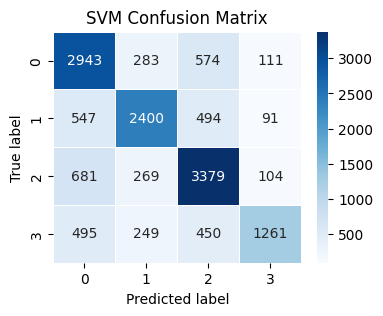

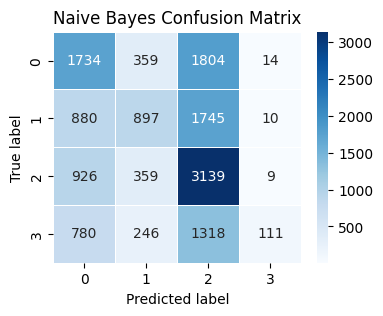

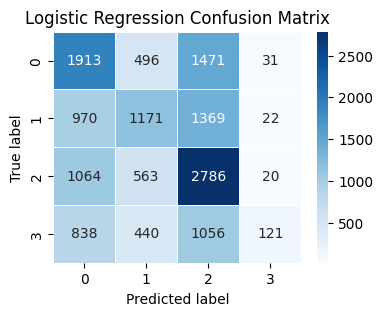

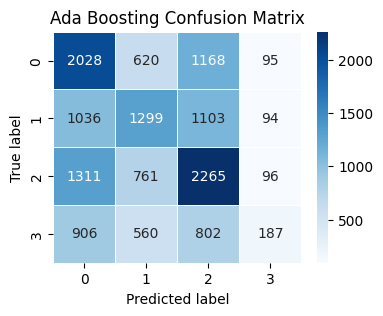

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrix as heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, "SVM Confusion Matrix")

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, "Naive Bayes Confusion Matrix")

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(lr_cm, "Logistic Regression Confusion Matrix")

# Plot confusion matrix for AdaBoosting
plot_confusion_matrix(ada_cm, "Ada Boosting Confusion Matrix")
